### Uber case study
        -Smita Hejmadi

#### 1.Importing libraries and datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
uc=pd.read_csv('Uber Request Data.csv')

#### 2. Initial analysis

In [4]:
uc.head()

Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47

In [5]:
uc.shape

(6745, 6)

In [7]:
uc['Request id'].nunique()

6745

In [8]:
uc['Driver id'].nunique()

300

In [9]:
uc['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

In [10]:
uc['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [46]:
ucd["req_year"]=ucd["Request timestamp"].dt.year
ucd["req_year"].unique()

array([2016], dtype=int64)

In [47]:
ucd["req_month"]=ucd["Request timestamp"].dt.month
ucd["req_month"].unique()

array([7], dtype=int64)

In [15]:
uc['Driver id'].isna().value_counts()

False    4095
True     2650
Name: Driver id, dtype: int64

In [16]:
uc['Drop timestamp'].isnull().value_counts()

True     3914
False    2831
Name: Drop timestamp, dtype: int64

#### 3. Pecentage wise status across pickupoints

In [12]:
ps=uc['Status'].value_counts()
ps

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

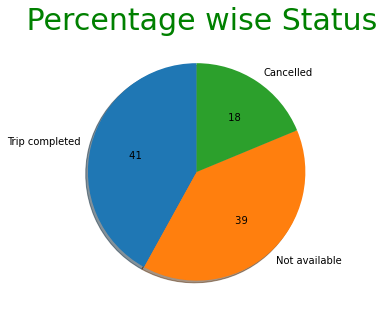

In [18]:
plt.figure(figsize=(10,5))
plt.title(' Percentage wise Status',color='Green',size=30)
plt.pie(ps,labels=['Trip completed','Not available','Cancelled'],autopct='% i',startangle=90,shadow=True)
plt.show()       

#### Inference 1: 
    Count of no cars available & driver id null matches
    Data pertains to July 2016
    Drop time null cases match Count of no cars available & cancelled trips
    39% is no cars available  & 18% cancelled rides

#### 4. Demand across pickup points

In [15]:
pp=uc['Pickup point'].value_counts()
ppc=pp['City']
ppa=pp['Airport']
pp,ppc,ppa

(City       3507
 Airport    3238
 Name: Pickup point, dtype: int64,
 3507,
 3238)

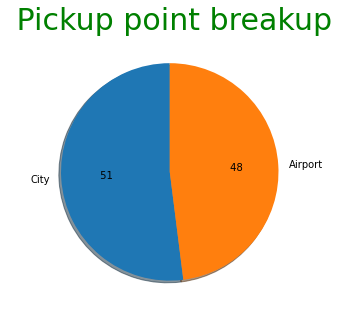

In [17]:
plt.figure(figsize=(10,5))
plt.title(' Pickup point breakup',color='Green',size=30)
plt.pie(pp,labels=['City','Airport'],autopct='% i',startangle=90,shadow=True)
plt.show()

#### Inference 2: Requests are marginally higher at the city than the airport

#### 5. Pickup point wise status

In [5]:
pap1=uc['Pickup point'].unique()
pap2=uc.groupby(by=['Pickup point','Status'])['Pickup point'].count()
print(pap1)
print(pap2)
print('In', pap1[0], 'total number of requests were',pap2[0]+pap2[1]+pap2[2],
      'number of cars not available is;',pap2[1],
      'number of trips completed is;',pap2[2],
      '& number of trips cancelled is',pap2[0])
print('In', pap1[1], 'total number of requests were',pap2[3]+pap2[4]+pap2[5],
      'number of cars not available is;',pap2[4],
      'number of trips completed is;',pap2[5],
      '& number of trips cancelled is',pap2[3])

['Airport' 'City']
Pickup point  Status           
Airport       Cancelled             198
              No Cars Available    1713
              Trip Completed       1327
City          Cancelled            1066
              No Cars Available     937
              Trip Completed       1504
Name: Pickup point, dtype: int64
In Airport total number of requests were 3238 number of cars not available is; 1713 number of trips completed is; 1327 & number of trips cancelled is 198
In City total number of requests were 3507 number of cars not available is; 937 number of trips completed is; 1504 & number of trips cancelled is 1066


#### 6. Countplot chart of status vs Pickup point

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

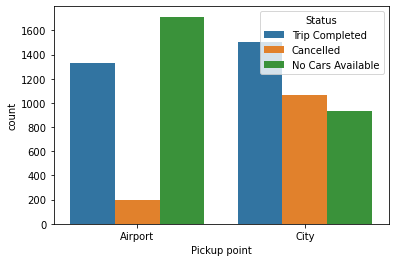

In [21]:
sns.countplot(x="Pickup point",hue="Status",data=uc)

#### 7. Status across pickuppoints

In [6]:
uc.groupby(by=['Status','Pickup point'])['Status'].count()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
Name: Status, dtype: int64

In [48]:
198+1066

1264

In [49]:
1327+1504

2831

In [50]:
1264+2831

4095

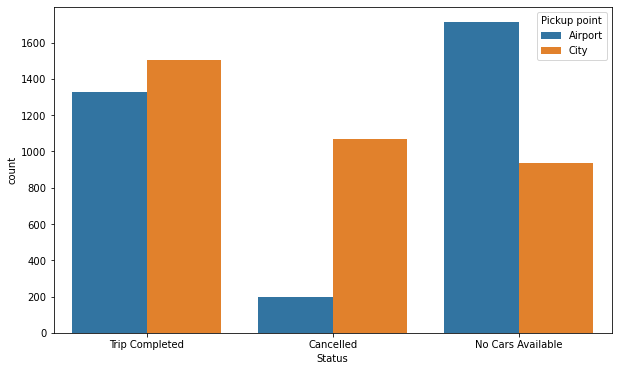

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x="Status",hue="Pickup point",data=uc)
plt.show()

#### 8. Sunburst chart of status vs Pickup point

In [4]:
def get_ind(x):
    if x=='No Cars Available':
        return 1
    elif x=='Cancelled':
        return 2
    else:
        return 3

In [5]:
uc['Stat_ind'] = uc['Status'].apply(get_ind)

In [24]:
uc

Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
...          ...          ...        ...                ...   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

        Request timestamp       Drop timestamp  Stat_ind  
0         11/7/2016 11:51      11/7/2016 13:00         3  
1         11/7/2016 17:57      11/7/2016 18:47         3  
2          12/7/2016 9:17       12/7/2016 9:58         3  
3         12/7/2016 21:08      12/7/2016 22:03         3  
4     13-07-2016 08:33:16  13-07-2016 09:25:47         3  
...                   ...                  ...       ...  
6740  15-07-2016 23:49:03                  NaN         1  
6741  15-07-2016 23:50:05                  NaN         1  
6742  15-07-2016 23:52:06                  NaN         1  
6743  15-07-2016 23:54:39                  NaN         1  
6744  15-07-2016 23:55:03                  NaN         1  

[6745 rows x 7 columns]

In [6]:
import plotly.express as px
%matplotlib inline
plt.figure(figsize=(5,5))
df = uc
fig = px.sunburst(uc, path=['Status','Pickup point'],values='Stat_ind',title=('Status pickup wise'))
fig.show()

<Figure size 360x360 with 0 Axes>

#### 9. Pickup Point vs status using the loc method instead of group by method

In [23]:
uc_ap_na=uc.loc[(uc['Pickup point']=='Airport') & (uc['Status']=='No Cars Available')]
uc_ap_tp=uc.loc[(uc['Pickup point']=='Airport') & (uc['Status']=='Trip Completed')]
uc_ap_cl=uc.loc[(uc['Pickup point']=='Airport') & (uc['Status']=='Cancelled')]
uc_ap_all=[uc_ap_na.shape[0],uc_ap_tp.shape[0],uc_ap_cl.shape[0]]
print('In airport, total number of requests were',ppa,
      'number of cars not available is;',uc_ap_na.shape[0],
      'number of trips completed is;',uc_ap_tp.shape[0],
      '& number of trips cancelled is',uc_ap_cl.shape[0])
uc_ap_all

In airport, total number of requests were 3238 number of cars not available is; 1713 number of trips completed is; 1327 & number of trips cancelled is 198


[1713, 1327, 198]

([<matplotlib.patches.Wedge at 0x18fa3328040>,
 [Text(-1.0954284514024824, -0.1001823729902605, 'No Cars Available'),
  Text(1.0944049131829885, -0.11080562260524363, 'Trip Completed'),
  Text(0.210017908083158, 1.0797650106779597, 'Cancelled')],
 [Text(-0.5975064280377176, -0.05464493072196027, ' 52'),
  Text(0.5969481344634482, -0.06043943051195106, ' 40'),
  Text(0.11455522259081345, 0.5889627330970688, ' 6')])

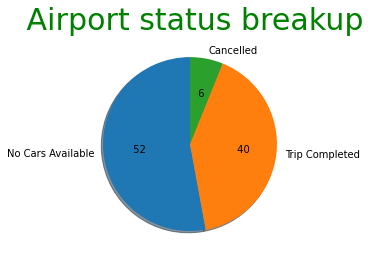

In [28]:
plt.title(' Airport status breakup',color='Green',size=30)
plt.pie(uc_ap_all,labels=['No Cars Available','Trip Completed','Cancelled'],autopct='% i',startangle=90,shadow=True)

In [26]:
uc_cy_na=uc.loc[(uc['Pickup point']=='City') & (uc['Status']=='No Cars Available')]
uc_cy_tp=uc.loc[(uc['Pickup point']=='City') & (uc['Status']=='Trip Completed')]
uc_cy_cl=uc.loc[(uc['Pickup point']=='City') & (uc['Status']=='Cancelled')]
uc_cy_all=[uc_cy_na.shape[0],uc_cy_tp.shape[0],uc_cy_cl.shape[0]]
print('In City, total number of requests were',ppc,
      'number of cars not available is;',uc_cy_na.shape[0],
      'number of trips completed is;',uc_cy_tp.shape[0],
      '& number of trips cancelled is',uc_cy_cl.shape[0])
uc_cy_all

In City, total number of requests were 3507 number of cars not available is; 937 number of trips completed is; 1504 & number of trips cancelled is 1066


[937, 1504, 1066]

([<matplotlib.patches.Wedge at 0x18fa2fa8550>,
 [Text(-0.8186451031891336, 0.7347245708593478, 'No Cars Available'),
  Text(-0.12683208692945336, -1.0926635446124848, 'Trip Completed'),
  Text(0.8979002231162211, 0.6354330722647671, 'Cancelled')],
 [Text(-0.4465336926486183, 0.4007588568323715, ' 26'),
  Text(-0.06918113832515638, -0.5959982970613553, ' 42'),
  Text(0.4897637580633933, 0.34659985759896383, ' 30')])

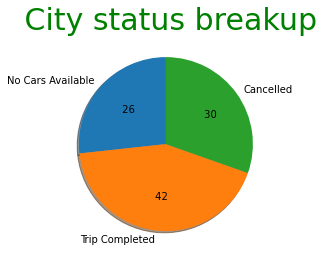

In [30]:
plt.title(' City status breakup',color='Green',size=30)
plt.pie(uc_cy_all,labels=['No Cars Available','Trip Completed','Cancelled'],autopct='% i',startangle=90,shadow=True)

#### Inference 3: Painpoints in the following order
    Airport with no cars available
    City with cancelled trips
    City with no cars available

#### 10.Introducing the element of hours for analysis of status during various points in a day
    Creating common format of date to enable extracting hour component of date

In [31]:
uc["Request timestamp"]=uc["Request timestamp"].astype(str)

In [32]:
uc["Request timestamp"]=uc["Request timestamp"].replace("/","-")

In [33]:
uc["Request timestamp"]=pd.to_datetime(uc["Request timestamp"],dayfirst=True)

In [34]:
uc["Drop timestamp"]=uc["Drop timestamp"].astype(str)

In [35]:
uc["Drop timestamp"]=uc["Drop timestamp"].replace("/","-")

In [17]:
uc.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp               object
Stat_ind                      int64
dtype: object

#### 11. To evaluate approximate time taken for a ride 

In [36]:
ucd=uc.loc[(uc['Status']=='Trip Completed')]
ucd

Request id Pickup point  Driver id          Status   Request timestamp  \
0            619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1            867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2           1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3           2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4           3112         City        1.0  Trip Completed 2016-07-13 08:33:16   
...          ...          ...        ...             ...                 ...   
2826        1315      Airport      300.0  Trip Completed 2016-07-11 22:54:00   
2827        2924         City      300.0  Trip Completed 2016-07-13 06:31:22   
2828        3324      Airport      300.0  Trip Completed 2016-07-13 12:33:21   
2829        3935      Airport      300.0  Trip Completed 2016-07-13 22:26:08   
2830        5844      Airport      300.0  Trip Completed 2016-07-15 09:07:09   

           Drop timestamp  Stat_ind  
0         11/7/2016 13:00         3  
1         11/7/2016 18:47         3  
2          12/7/2016 9:58         3  
3         12/7/2016 22:03         3  
4     13-07-2016 09:25:47         3  
...                   ...       ...  
2826      11/7/2016 23:35         3  
2827  13-07-2016 07:20:52         3  
2828  13-07-2016 13:16:03         3  
2829  13-07-2016 23:43:13         3  
2830  15-07-2016 09:56:07         3  

[2831 rows x 7 columns]

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
ucd["Request timestamp"]=ucd["Request timestamp"].astype(str)

In [39]:
ucd["Request timestamp"]=ucd["Request timestamp"].replace("/","-")

In [40]:
ucd["Request timestamp"]=pd.to_datetime(ucd["Request timestamp"],dayfirst=True)

In [41]:
ucd["Drop timestamp"]=ucd["Drop timestamp"].astype(str)

In [42]:
ucd["Drop timestamp"]=ucd["Drop timestamp"].replace("/","-")

In [43]:
ucd["Drop timestamp"]=pd.to_datetime(ucd["Drop timestamp"],dayfirst=True)

In [44]:
ucd.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
Stat_ind                      int64
dtype: object

In [45]:
ucd["req_year"]=ucd["Request timestamp"].dt.year

In [46]:
ucd["req_year"].unique()

array([2016], dtype=int64)

In [47]:
ucd["req_hour"]=ucd["Request timestamp"].dt.hour

In [48]:
ucd["drop_hour"]=ucd["Drop timestamp"].dt.hour

In [49]:
ucd['diff']=ucd["drop_hour"]-ucd["req_hour"]
ucd['diff'].sort_values().unique()

array([-23, -22,   0,   1,   2], dtype=int64)

In [50]:
ucd

Request id Pickup point  Driver id          Status   Request timestamp  \
0            619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1            867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2           1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3           2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4           3112         City        1.0  Trip Completed 2016-07-13 08:33:16   
...          ...          ...        ...             ...                 ...   
2826        1315      Airport      300.0  Trip Completed 2016-07-11 22:54:00   
2827        2924         City      300.0  Trip Completed 2016-07-13 06:31:22   
2828        3324      Airport      300.0  Trip Completed 2016-07-13 12:33:21   
2829        3935      Airport      300.0  Trip Completed 2016-07-13 22:26:08   
2830        5844      Airport      300.0  Trip Completed 2016-07-15 09:07:09   

          Drop timestamp  Stat_ind  req_year  req_hour  drop_hour  diff  
0    2016-07-11 13:00:00         3      2016        11         13     2  
1    2016-07-11 18:47:00         3      2016        17         18     1  
2    2016-07-12 09:58:00         3      2016         9          9     0  
3    2016-07-12 22:03:00         3      2016        21         22     1  
4    2016-07-13 09:25:47         3      2016         8          9     1  
...                  ...       ...       ...       ...        ...   ...  
2826 2016-07-11 23:35:00         3      2016        22         23     1  
2827 2016-07-13 07:20:52         3      2016         6          7     1  
2828 2016-07-13 13:16:03         3      2016        12         13     1  
2829 2016-07-13 23:43:13         3      2016        22         23     1  
2830 2016-07-15 09:56:07         3      2016         9          9     0  

[2831 rows x 11 columns]

In [53]:
ucd.shape

(2831, 10)

In [51]:
ucd['diff'].value_counts()

 1     2135
 0      485
 2      113
-23      84
-22      14
Name: diff, dtype: int64

In [52]:
ucdaydiff=ucd["Request timestamp"].dt.day-ucd["Drop timestamp"].dt.day
ucdaydiff.value_counts()

 0    2733
-1      98
dtype: int64

#### Inference 4
    The max ridetime across all rides is 2 hours.
    There were 98 rides which spilt over from one date to another. Midnight rides

#### 12. To identify the pattern of status across pickuppoint and time slots

In [53]:
uc["req_hour"]=uc["Request timestamp"].dt.hour

In [35]:
uc

Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
...          ...          ...        ...                ...   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

       Request timestamp       Drop timestamp  Stat_ind  req_hour  
0    2016-07-11 11:51:00      11/7/2016 13:00         3        11  
1    2016-07-11 17:57:00      11/7/2016 18:47         3        17  
2    2016-07-12 09:17:00       12/7/2016 9:58         3         9  
3    2016-07-12 21:08:00      12/7/2016 22:03         3        21  
4    2016-07-13 08:33:16  13-07-2016 09:25:47         3         8  
...                  ...                  ...       ...       ...  
6740 2016-07-15 23:49:03                  nan         1        23  
6741 2016-07-15 23:50:05                  nan         1        23  
6742 2016-07-15 23:52:06                  nan         1        23  
6743 2016-07-15 23:54:39                  nan         1        23  
6744 2016-07-15 23:55:03                  nan         1        23  

[6745 rows x 8 columns]

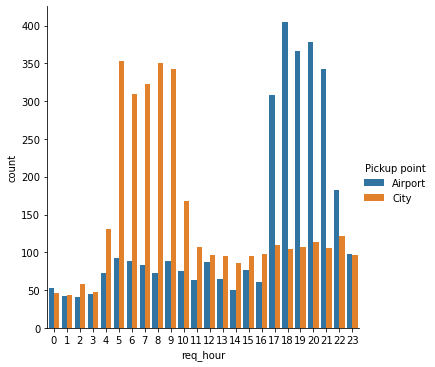

In [36]:
sns.factorplot(x="req_hour",data=uc,hue="Pickup point",kind="count")
plt.show()

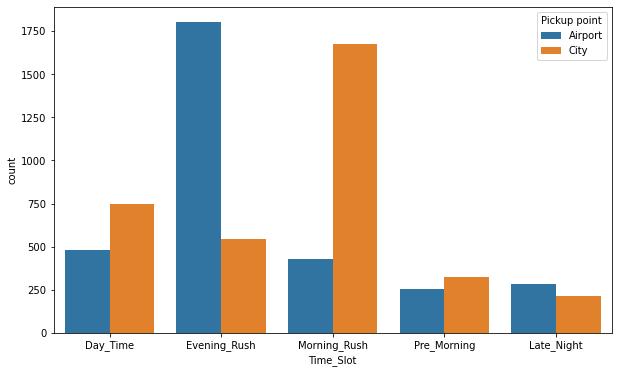

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(x="Time_Slot",hue="Pickup point",data=uc)
plt.show()

In [ ]:
#### Inference 5:
      The demand is higher at the Airport during evening hours and in the City in the morning
        hours.

### 13.Splitting the demand in hours across various time slots for further analysis

In [60]:
uc["Time_Slot"]=0

In [61]:
j=0
for i in uc["req_hour"]:
    if uc.iloc[j,7]<5:
        uc.iloc[j,8]="Pre_Morning"
    elif 5<=uc.iloc[j,7]<10:
        uc.iloc[j,8]="Morning_Rush"
        
    elif 10<=uc.iloc[j,7]<17:
        uc.iloc[j,8]="Day_Time"
        
    elif 17<=uc.iloc[j,7]<22:
        uc.iloc[j,8]="Evening_Rush"
    else:
        uc.iloc[j,8]="Late_Night"
    j=j+1

In [39]:
uc.groupby(by=['Time_Slot','Status'])['Pickup point'].count()

Time_Slot     Status           
Day_Time      Cancelled             168
              No Cars Available     334
              Trip Completed        722
Evening_Rush  Cancelled             166
              No Cars Available    1392
              Trip Completed        784
Late_Night    Cancelled              22
              No Cars Available     219
              Trip Completed        257
Morning_Rush  Cancelled             843
              No Cars Available     406
              Trip Completed        854
Pre_Morning   Cancelled              65
              No Cars Available     299
              Trip Completed        214
Name: Pickup point, dtype: int64

In [40]:
uc.groupby(by=['Time_Slot','Pickup point','Status'])['Pickup point'].count()

Time_Slot     Pickup point  Status           
Day_Time      Airport       Cancelled              64
                            No Cars Available      87
                            Trip Completed        327
              City          Cancelled             104
                            No Cars Available     247
                            Trip Completed        395
Evening_Rush  Airport       Cancelled             106
                            No Cars Available    1321
                            Trip Completed        373
              City          Cancelled              60
                            No Cars Available      71
                            Trip Completed        411
Late_Night    Airport       Cancelled               3
                            No Cars Available     136
                            Trip Completed        142
              City          Cancelled              19
                            No Cars Available      83
                            Trip Com

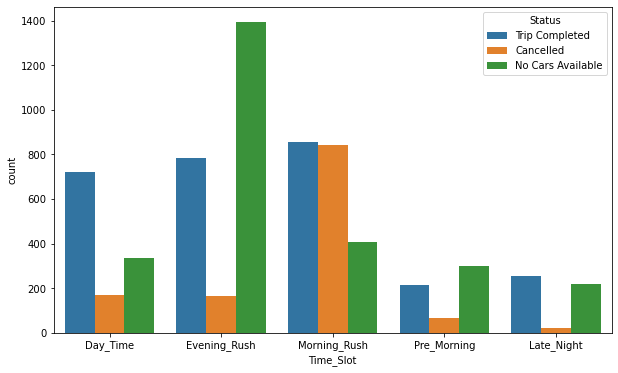

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(x="Time_Slot",hue="Status",data=uc)
plt.show()

#### Inference 6 : 
    #The demand supply gap is high in the evening rush hours in the airport. The total number 
    of requests that could not be handled due to non-availability of cars was 1392 of which 
    the airport cases accounted for 1321 cases.
    #The demand supply gap on account of cancellation is high in the morning rush hours in 
     the city.The total number of cancellations in this time slot was 843 of which the 
     city ride requests cancelled , accounted for 820 cases.

#### 14.Driver wise performance
       Identifying drivers with number of 6 or more cancellation or 
       trips completed  greater than 9

In [73]:
uc_tp=uc.loc[uc['Status']=='Trip Completed']
uc_cl=uc.loc[uc['Status']=='Cancelled']

In [74]:
tp=uc_tp.groupby(by=['Driver id','Pickup point','Status',])['Pickup point'].count()
cl=uc_cl.groupby(by=['Driver id','Pickup point','Status',])['Pickup point'].count()
tpp=uc_tp.groupby(by=['Driver id','Status',])['Pickup point'].count()
clc=uc_cl.groupby(by=['Driver id','Status',])['Pickup point'].count()

In [75]:
tp=pd.DataFrame(tp)
cl=pd.DataFrame(cl)
tpp=pd.DataFrame(tpp)
clc=pd.DataFrame(clc)

In [67]:
tp.shape,cl.shape

((596, 1), (436, 1))

In [83]:
tpp.shape,clc.shape

((300, 1), (295, 1))

In [76]:
 def get_perf_tp(x):
    if x > 9: 
        return 'Performer'
    else:
        return 'Within range'

In [77]:
def get_perf_cl(x):
    if x > 5: 
        return 'Alert'
    else:
        return 'Within range'

In [78]:
tp['Perf_ind']=tp['Pickup point'].apply(get_perf_tp)

In [79]:
cl['Perf_ind']=cl['Pickup point'].apply(get_perf_cl)

In [80]:
tp

Pickup point      Perf_ind
Driver id Pickup point Status                                    
1.0       Airport      Trip Completed             6  Within range
          City         Trip Completed             3  Within range
2.0       Airport      Trip Completed             4  Within range
          City         Trip Completed             5  Within range
3.0       Airport      Trip Completed             7  Within range
...                                             ...           ...
298.0     City         Trip Completed             6  Within range
299.0     Airport      Trip Completed             2  Within range
          City         Trip Completed             5  Within range
300.0     Airport      Trip Completed             4  Within range
          City         Trip Completed             1  Within range

[596 rows x 2 columns]

<AxesSubplot:xlabel='Pickup point', ylabel='Status'>

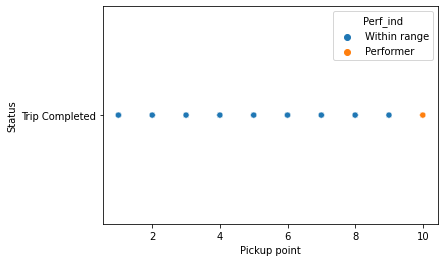

In [92]:
sns.scatterplot(x='Pickup point',y='Status',hue='Perf_ind',data=tp)

In [81]:
cl

Pickup point      Perf_ind
Driver id Pickup point Status                               
1.0       Airport      Cancelled             1  Within range
          City         Cancelled             3  Within range
2.0       Airport      Cancelled             3  Within range
          City         Cancelled             1  Within range
3.0       Airport      Cancelled             1  Within range
...                                        ...           ...
297.0     Airport      Cancelled             1  Within range
          City         Cancelled             3  Within range
298.0     City         Cancelled             4  Within range
299.0     City         Cancelled             5  Within range
300.0     City         Cancelled             1  Within range

[436 rows x 2 columns]

<AxesSubplot:xlabel='Status', ylabel='Pickup point'>

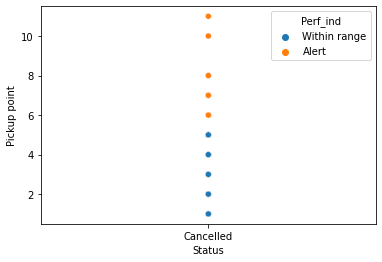

In [98]:
sns.scatterplot(x='Status',y='Pickup point',hue='Perf_ind',data=cl)

In [82]:
tpp['Perf_ind']=tpp['Pickup point'].apply(get_perf_tp)

In [83]:
clc['Perf_ind']=clc['Pickup point'].apply(get_perf_cl)

In [84]:
tpp.sort_values(by='Pickup point',axis=0,ascending=False)

Pickup point      Perf_ind
Driver id Status                                    
22.0      Trip Completed            16     Performer
233.0     Trip Completed            15     Performer
184.0     Trip Completed            15     Performer
126.0     Trip Completed            14     Performer
107.0     Trip Completed            14     Performer
...                                ...           ...
216.0     Trip Completed             5  Within range
93.0      Trip Completed             5  Within range
169.0     Trip Completed             5  Within range
300.0     Trip Completed             5  Within range
117.0     Trip Completed             4  Within range

[300 rows x 2 columns]

In [85]:
Perf=tpp.loc[tpp['Perf_ind']=='Performer']
pd.DataFrame(Perf)

Pickup point   Perf_ind
Driver id Status                                 
3.0       Trip Completed            10  Performer
4.0       Trip Completed            10  Performer
5.0       Trip Completed            11  Performer
6.0       Trip Completed            10  Performer
9.0       Trip Completed            13  Performer
...                                ...        ...
289.0     Trip Completed            12  Performer
294.0     Trip Completed            11  Performer
296.0     Trip Completed            10  Performer
297.0     Trip Completed            11  Performer
298.0     Trip Completed            11  Performer

[143 rows x 2 columns]

In [86]:
clc.sort_values(by='Pickup point',axis=0,ascending=False)

Pickup point      Perf_ind
Driver id Status                               
84.0      Cancelled            12         Alert
54.0      Cancelled            11         Alert
206.0     Cancelled            10         Alert
142.0     Cancelled            10         Alert
267.0     Cancelled             9         Alert
...                           ...           ...
208.0     Cancelled             1  Within range
123.0     Cancelled             1  Within range
188.0     Cancelled             1  Within range
162.0     Cancelled             1  Within range
300.0     Cancelled             1  Within range

[295 rows x 2 columns]

In [101]:
Alert=clc.loc[clc['Perf_ind']=='Alert']
pd.DataFrame(Alert)

Pickup point Perf_ind
Driver id Status                          
9.0       Cancelled             6    Alert
20.0      Cancelled             7    Alert
24.0      Cancelled             6    Alert
27.0      Cancelled             9    Alert
31.0      Cancelled             6    Alert
...                           ...      ...
285.0     Cancelled             6    Alert
286.0     Cancelled             6    Alert
287.0     Cancelled             6    Alert
290.0     Cancelled             7    Alert
295.0     Cancelled             6    Alert

[74 rows x 2 columns]

#### Inference :Performance analysis of drivers 
        Taking a base of 5 or more rides cancelled or trips completed.
        74 drivers had 6 or more cancelled rides
        143 drivers had 10 or more trip completed.

#### Graph summary

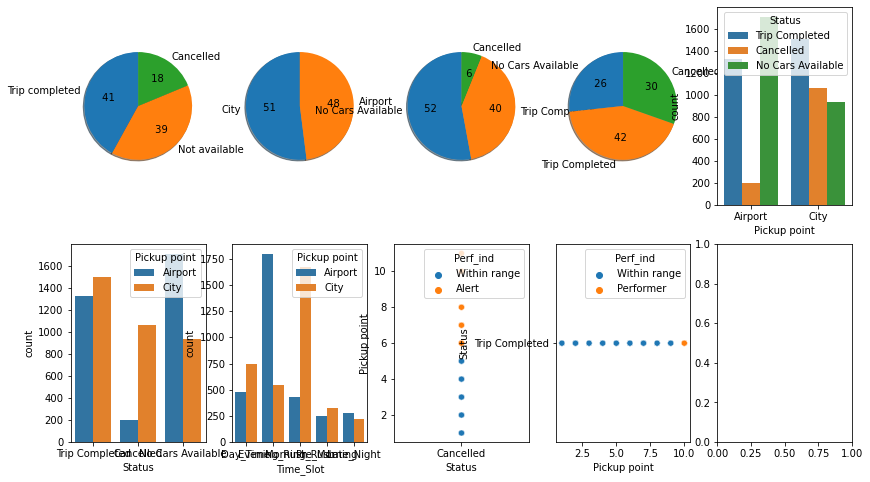

<Figure size 288x1080 with 0 Axes>

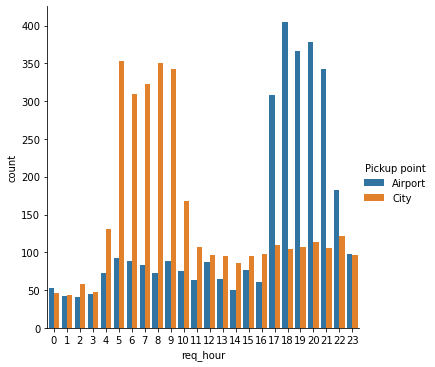

In [103]:
fig,ax=plt.subplots(2,5,figsize=(14,8))
#using matplotlib
#plt.title(' Percentage wise Status',color='Green',size=30)
ax[0,0].pie(ps,labels=['Trip completed','Not available','Cancelled'],autopct='% i',startangle=90,shadow=True)
ax[0,1].pie(pp,labels=['City','Airport'],autopct='% i',startangle=90,shadow=True)
plt.figure(figsize=(4,15))
sns.countplot(x="Pickup point",hue="Status",data=uc,ax=ax[0,4])
sns.countplot(x="Status",hue="Pickup point",data=uc,ax=ax[1,0])
ax[0,2].pie(uc_ap_all,labels=['No Cars Available','Trip Completed','Cancelled'],autopct='% i',startangle=90,shadow=True)
ax[0,3].pie(uc_cy_all,labels=['No Cars Available','Trip Completed','Cancelled'],autopct='% i',startangle=90,shadow=True)
sns.countplot(x="Time_Slot",hue="Pickup point",data=uc,ax=ax[1,1])
sns.factorplot(x="req_hour",data=uc,hue="Pickup point",kind="count",ax=ax[1,4])
sns.scatterplot(x='Status',y='Pickup point',hue='Perf_ind',data=cl,ax=ax[1,2])
sns.scatterplot(x='Pickup point',y='Status',hue='Perf_ind',data=tp,ax=ax[1,3])
#sns.scatterplot(x='total_bill',y='tip',hue='sex',data=tips,ax=ax[1,0])
plt.show()

#### Suggestions